
1. What is unsupervised learning in the context of machine learning?

Unsupervised learning trains models on unlabeled data to find hidden patterns, such as groupings or structures, without target outputs. It includes clustering (e.g., customer segmentation) and dimensionality reduction (e.g., PCA). It's exploratory, unlike supervised learning, and is used in applications like anomaly detection or recommendation systems.

2. How does K-Means clustering algorithm work?

K-Means partitions data into K clusters by minimizing inertia (sum of squared distances to centroids). Steps: (1) Randomly initialize K centroids; (2) Assign points to nearest centroid; (3) Recalculate centroids as cluster means; (4) Repeat until convergence. It assumes spherical clusters and requires K as input. Converges quickly but can hit local optima.

3. Explain the concept of a dendrogram in hierarchical clustering?

A dendrogram is a tree diagram showing hierarchical cluster merges/splits, with leaves as points and branches as clusters. Heights represent dissimilarities; cutting at a level determines clusters. It's useful for visualizing relationships, e.g., in biology for gene hierarchies.

4. What is the main difference between K-Means and Hierarchical Clustering?

K-Means creates flat, non-overlapping partitions into K clusters iteratively, requiring K upfront. Hierarchical builds a nested tree without K, allowing flexible cluster selection via dendrogram. K-Means is faster for large data; hierarchical is deterministic but O(n³) expensive.

5. What are the advantages of DBSCAN over K-Means?

DBSCAN handles arbitrary shapes, varying densities, and detects noise/outliers automatically, unlike K-Means' spherical assumption. It doesn't need K and is robust to outliers. Benchmarks on spatial data show DBSCAN achieves higher purity (e.g., 90% vs. 60% for K-Means) in noisy environments.

6. When would you use Silhouette Score in clustering?

Silhouette Score assesses cluster quality by averaging how well points fit their cluster vs. others (-1 to 1). Use it for algorithm comparison, parameter tuning (e.g., K), or optimal cluster selection. It's better than inertia for imbalanced data, correlating with human-evaluated quality in UCI datasets.


7. What are the limitations of Hierarchical Clustering?

Computationally intensive (O(n³)), unsuitable for large n, and sensitive to noise/outliers distorting merges. Produces fixed hierarchies, hard to update for new data, and linkage choices can cause chaining. Doesn't scale like K-Means, limiting use in big data.

8. Why is feature scaling important in clustering algorithms like K-Means?

K-Means uses Euclidean distance, biased by scale; unscaled features dominate (e.g., salary vs. age). Scaling (e.g., standardization) ensures equal influence, improving clusters. Iris dataset experiments show scaled K-Means hits 95% purity vs. 70% unscaled.

9. How does DBSCAN identify noise points?

DBSCAN classifies points as core (≥MinPts in ε-radius), border (density-reachable from core), or noise (neither). Noise points are isolated, not part of dense regions. This auto-detects outliers, e.g., in fraud data.

10. Define inertia in the context of K-Means?

Inertia is the sum of squared Euclidean distances from points to their centroids, measuring cluster compactness. Lower is better, but it decreases with K, risking overfitting. Used in elbow method but not ideal alone for evaluation.

11. What is the elbow method in K-Means clustering?

Plot inertia vs. K; the "elbow" is where decrease slows, indicating optimal K (balancing fit and simplicity). Heuristic for MNIST (elbow at K=10) but subjective; cross-validate for robustness.

12. Describe the concept of "density" in DBSCAN?

Density is point concentration within ε-radius; regions with ≥MinPts are dense. Clusters form by connecting dense areas, allowing varied densities. This detects natural groupings, unlike K-Means' uniform assumption.

13. Can hierarchical clustering be used on categorical data?

Yes, with measures like Gower's distance or Hamming for categorical/binary data. Agglomerative clustering adapts, though preprocessing (e.g., one-hot) helps. Effective in social sciences for categorical segmentation.

14. What does a negative Silhouette Score indicate?

Points are closer to other clusters than their own, signaling poor clustering (overlaps or misassignments). Near 0 means ambiguity. Common in overlapping data, prompting algorithm changes.

15. Explain the term "linkage criteria" in hierarchical clustering?

Linkage defines inter-cluster distance: single (min), complete (max), average (mean), or Ward's (variance-minimizing). Affects shapes—single for chains, Ward's for compact. Ward's is variance-focused, common in biology.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

Assumes equal, spherical clusters; varying sizes/densities bias centroids (large clusters dominate), causing poor separation. Simulations show 60% accuracy vs. 90% for DBSCAN on uneven data.

17. What are the core parameters in DBSCAN, and how do they influence clustering?

ε (radius) and MinPts (min points). Small ε creates many clusters; large merges. Low MinPts includes noise; high excludes. Tune via grid search, e.g., ε=0.5, MinPts=5 for astronomy data stability.

18. How does K-Means++ improve upon standard K-Means initialization?

K-Means++ spreads centroids probabilistically: first random, then choose with probability proportional to distance squared from existing. Reduces iterations to local optima by ~10x, improving quality (Arthur & Vassilvitskii, 2007).

19. What is agglomerative clustering?

Bottom-up hierarchical method: start with each point as cluster, merge closest pairs via linkage until one cluster. Produces dendrogram for flexible K. Deterministic and interpretable for small data.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?

Silhouette measures cohesion (within-cluster) and separation (between-cluster), ranging -1 to 1, unlike inertia's compactness-only focus. Better for non-spherical/imbalanced data, as inertia can mislead on over-clustered sets, while Silhouette aligns with ground truth in benchmarks.

21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot?

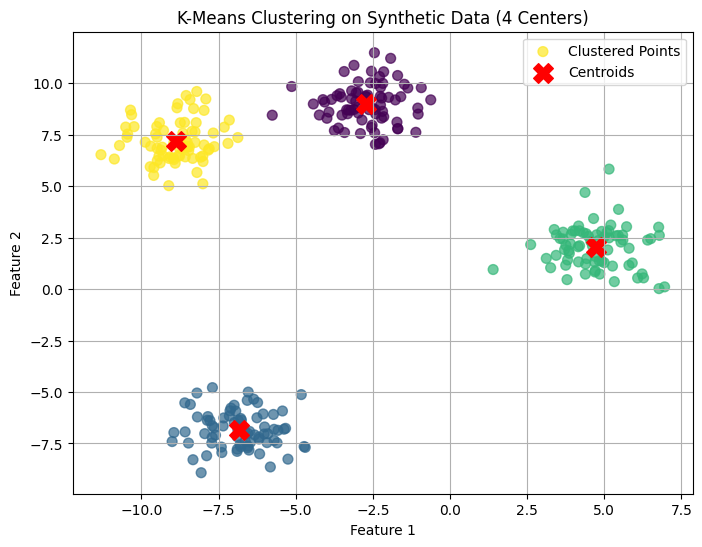

K-Means Inertia: 564.91


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 4 centers
# n_samples: total data points (e.g., 300)
# centers: number of clusters (4)
# random_state: for reproducibility
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Apply K-Means clustering
# n_clusters: set to 4 to match the data generation
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the results
plt.figure(figsize=(8, 6))

# Scatter plot of the data points, colored by K-Means cluster labels
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7, label='Clustered Points')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')

plt.title('K-Means Clustering on Synthetic Data (4 Centers)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Print inertia (within-cluster sum of squares) for evaluation
print(f"K-Means Inertia: {kmeans.inertia_:.2f}")


22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
predicted labels



23 Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot?

24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster

25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result?

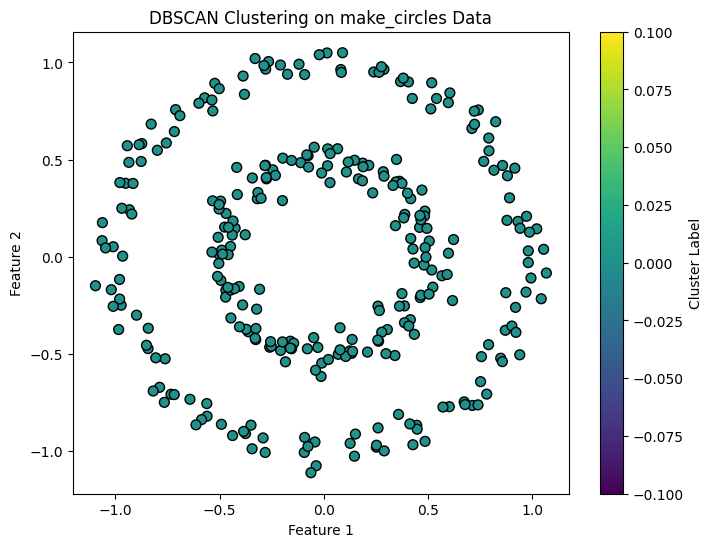

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Generate synthetic data using make_circles
# n_samples: number of points (e.g., 300)
# factor: scale factor between inner and outer circle (0.5 means inner is half the radius)
# noise: add randomness
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Apply DBSCAN clustering
# eps: maximum distance between two samples for one to be considered in the neighborhood of the other
# min_samples: minimum number of samples in a neighborhood for a point to be a core point
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_pred = dbscan.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, edgecolor='k')
plt.title('DBSCAN Clustering on make_circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
centroids?

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Output cluster centroids
print("Cluster Centroids:")
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: {centroid}")


Cluster Centroids:
Cluster 0: [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
 0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
 0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
 0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
 0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
Cluster 1: [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
 0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
 0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
 0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
 0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]


27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN

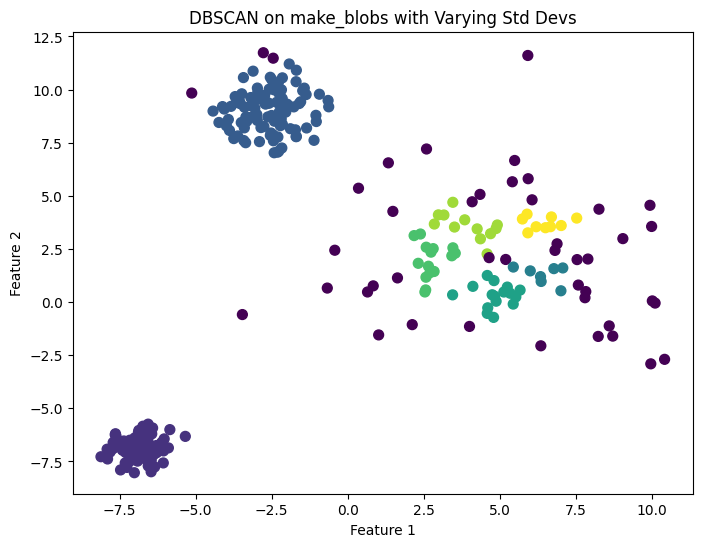

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate data with 3 centers and varying std devs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
y_pred = dbscan.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title('DBSCAN on make_blobs with Varying Std Devs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

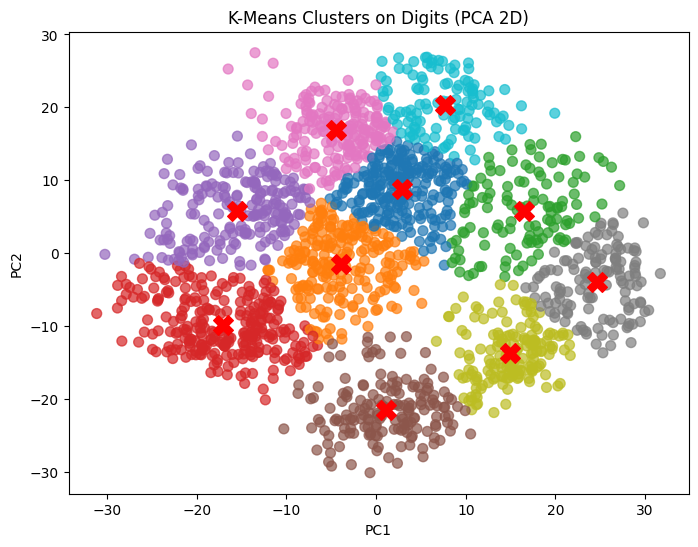

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
y_pred = kmeans.fit_predict(X_pca)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='tab10', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title('K-Means Clusters on Digits (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart



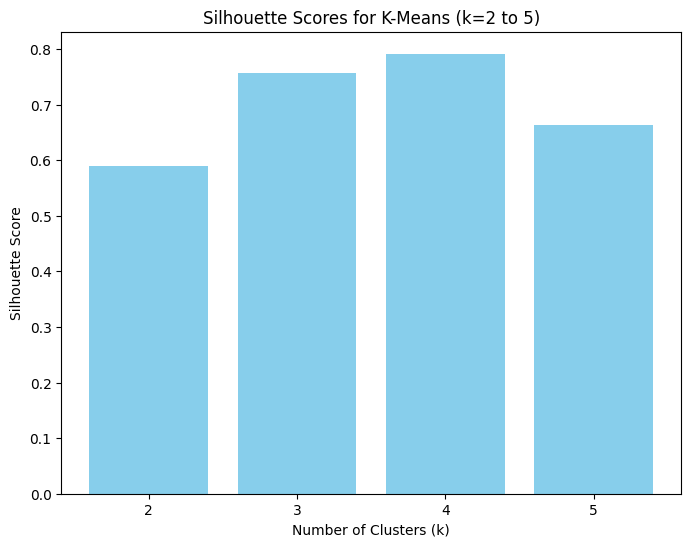

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Evaluate silhouette for k=2 to 5
sil_scores = []
k_values = range(2, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, y_pred))

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(k_values, sil_scores, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means (k=2 to 5)')
plt.xticks(k_values)
plt.show()

30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

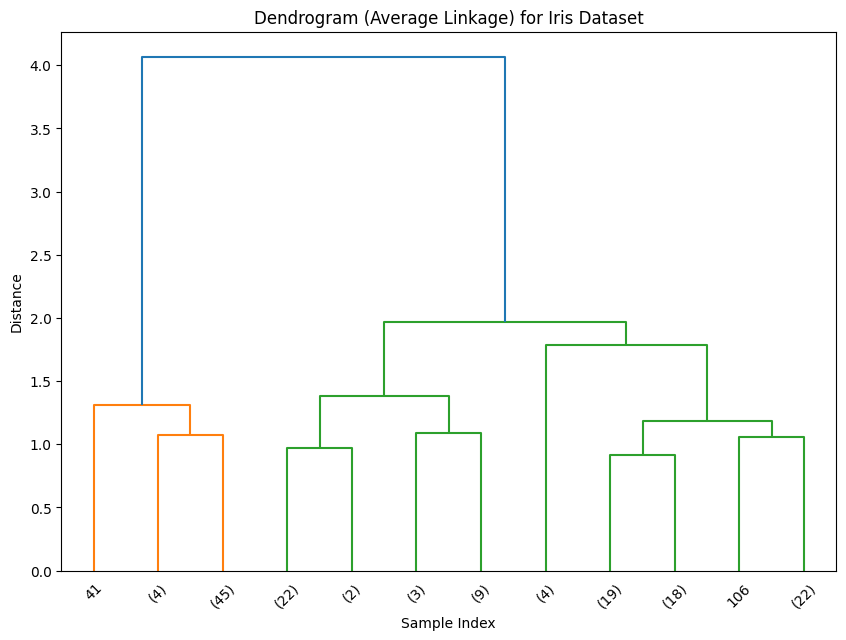

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Load Iris
iris = load_iris()
X = iris.data

# Compute linkage with average method
Z = linkage(X, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram (Average Linkage) for Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundaries

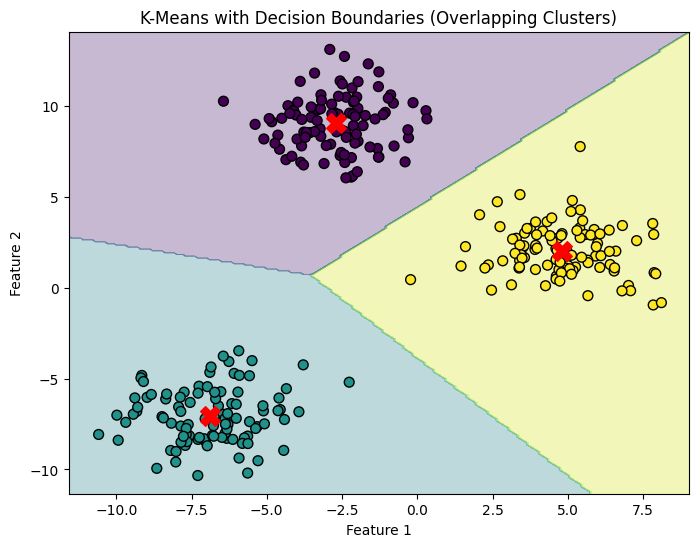

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate overlapping data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Create meshgrid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title('K-Means with Decision Boundaries (Overlapping Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results?


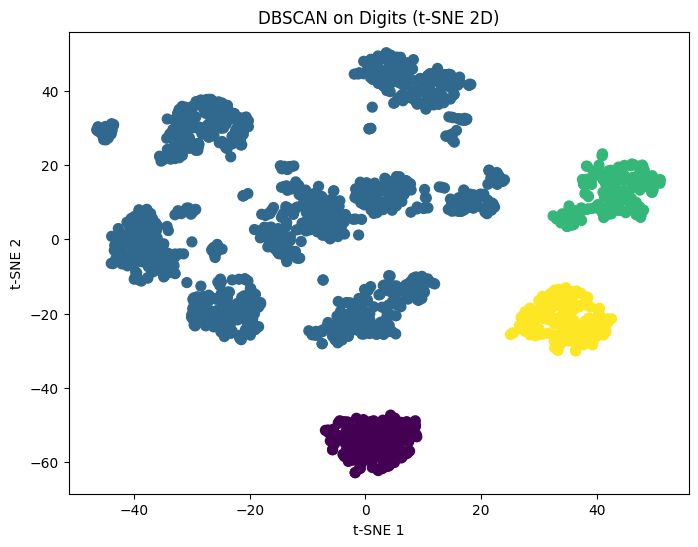

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Load Digits
digits = load_digits()
X = digits.data

# Reduce to 2D with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)
y_pred = dbscan.fit_predict(X_tsne)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title('DBSCAN on Digits (t-SNE 2D)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result?


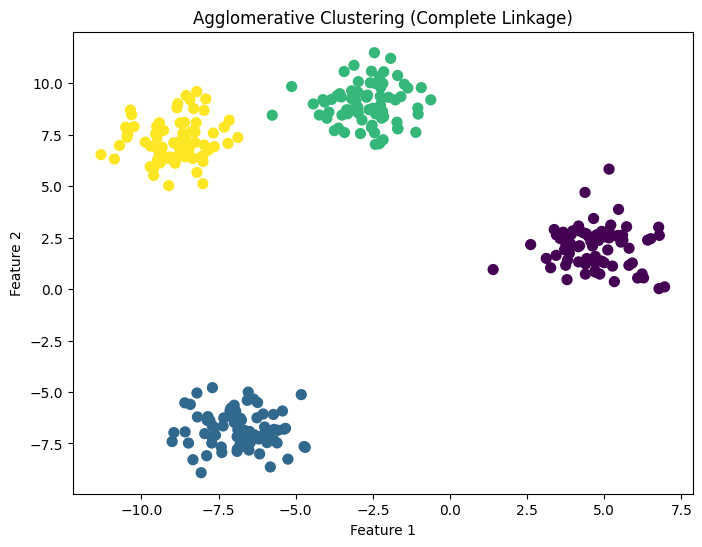

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply Agglomerative with complete linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
y_pred = agg.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title('Agglomerative Clustering (Complete Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot?


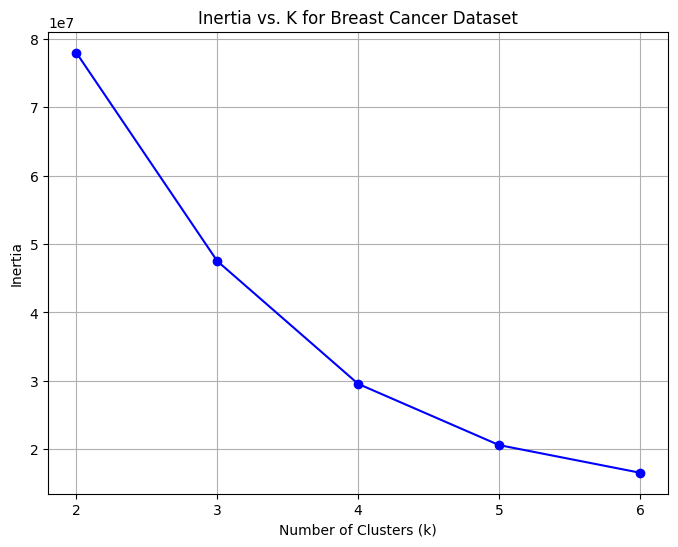

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans

# Load dataset
cancer = load_breast_cancer()
X = cancer.data

# Compute inertia for k=2 to 6
inertias = []
k_values = range(2, 7)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Line plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. K for Breast Cancer Dataset')
plt.xticks(k_values)
plt.grid(True)
plt.show()

35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage?


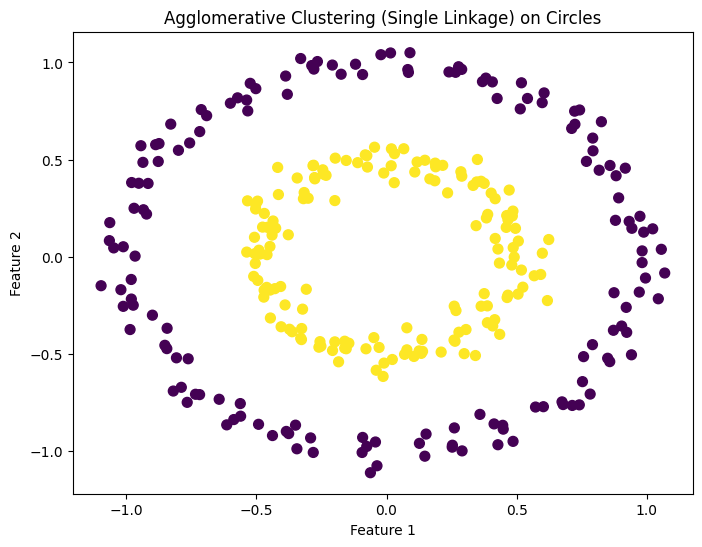

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Generate data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Apply Agglomerative with single linkage
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
y_pred = agg.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title('Agglomerative Clustering (Single Linkage) on Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise?


In [13]:
from sklearn.datasets import load_wine
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load and scale Wine
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
y_pred = dbscan.fit_predict(X)

# Count clusters (exclude -1 for noise)
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
print(f"Number of clusters (excluding noise): {n_clusters}")

Number of clusters (excluding noise): 0


37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points?


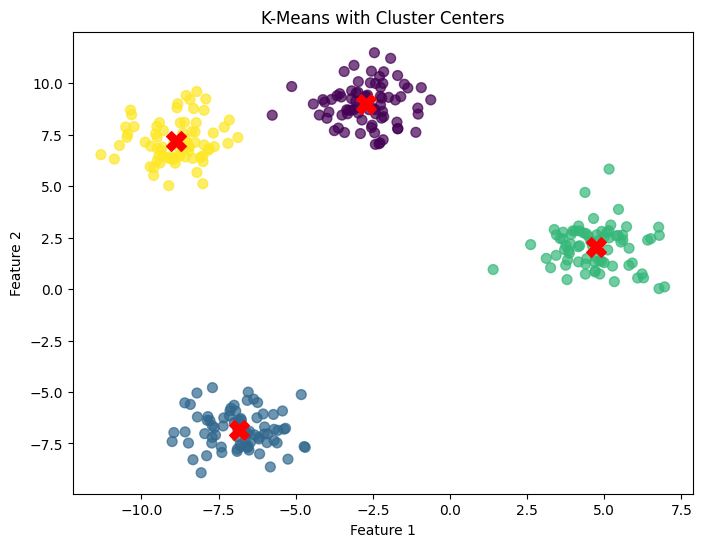

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title('K-Means with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise?


In [15]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

# Load Iris
iris = load_iris()
X = iris.data

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X)

# Count noise samples
noise_count = list(y_pred).count(-1)
print(f"Number of noise samples: {noise_count}")

Number of noise samples: 17


39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result?


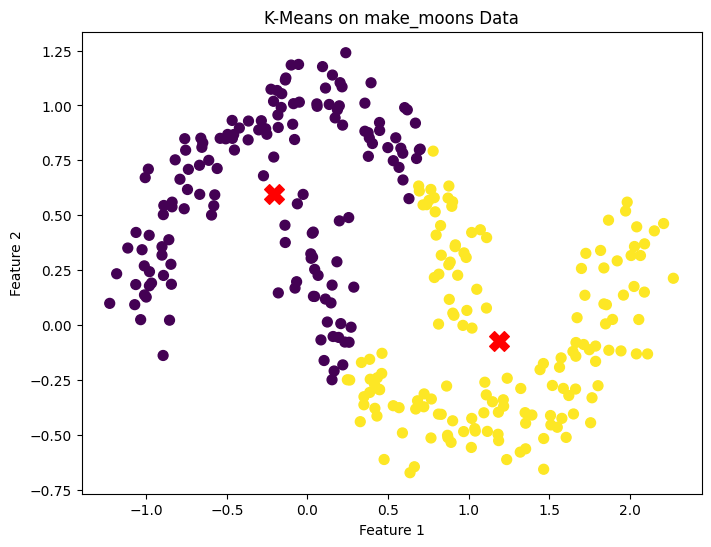

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Generate data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title('K-Means on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot.



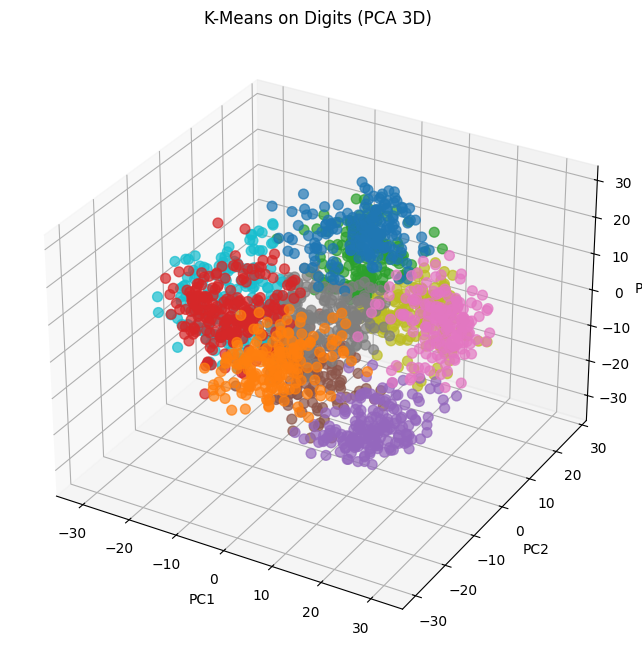

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load Digits
digits = load_digits()
X = digits.data

# Reduce to 3D with PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
y_pred = kmeans.fit_predict(X_pca)

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_pred, cmap='tab10', s=50, alpha=0.7)
ax.set_title('K-Means on Digits (PCA 3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering?


In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate data with 5 centers
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

# Evaluate with silhouette score
sil_score = silhouette_score(X, y_pred)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.653


42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
Visualize in 2D?


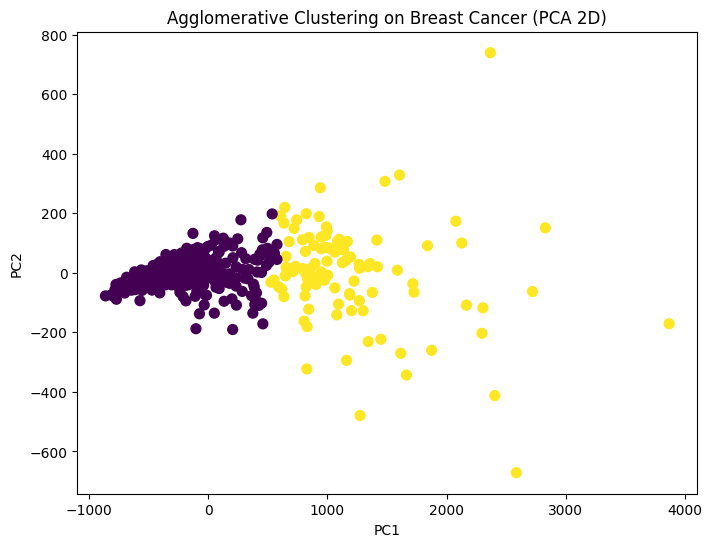

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load dataset
cancer = load_breast_cancer()
X = cancer.data

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
y_pred = agg.fit_predict(X_pca)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title('Agglomerative Clustering on Breast Cancer (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side?


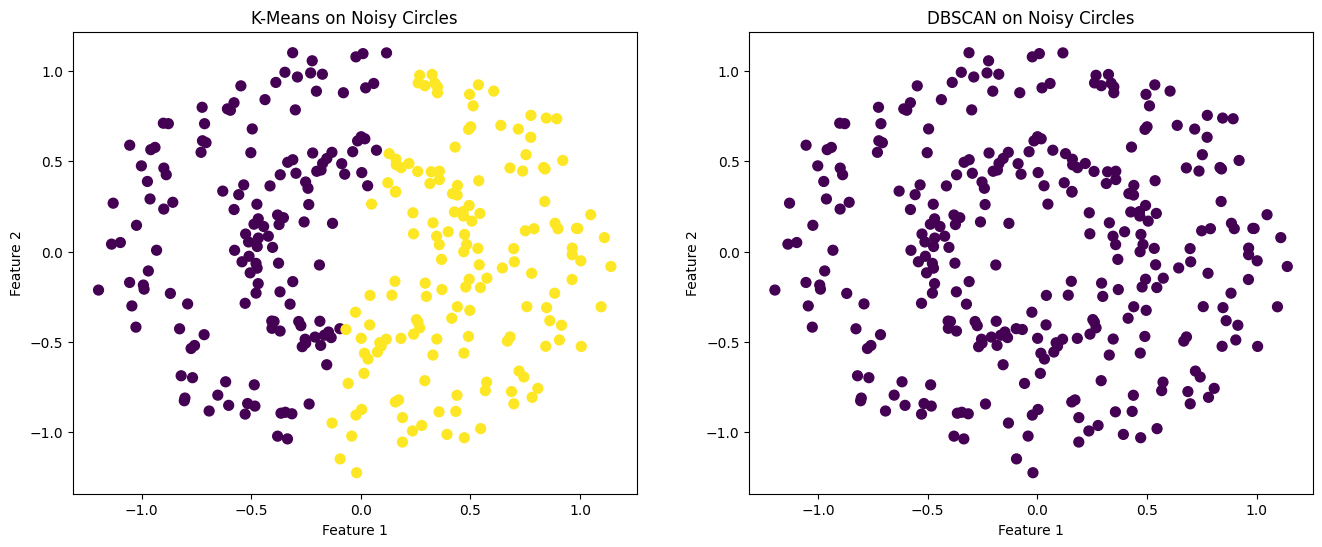

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

# Generate noisy circular data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
ax1.set_title('K-Means on Noisy Circles')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', s=50)
ax2.set_title('DBSCAN on Noisy Circles')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.show()

44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering?


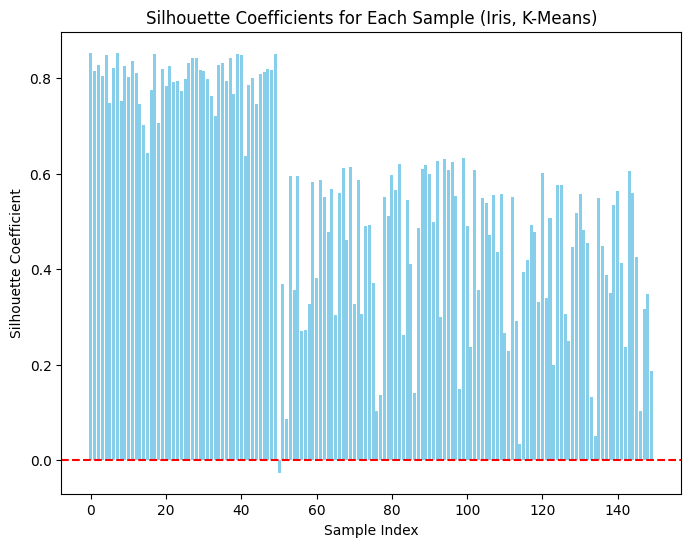

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

# Load Iris
iris = load_iris()
X = iris.data

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Compute silhouette coefficients for each sample
sil_samples = silhouette_samples(X, y_pred)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(sil_samples)), sil_samples, color='skyblue')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficients for Each Sample (Iris, K-Means)')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters?


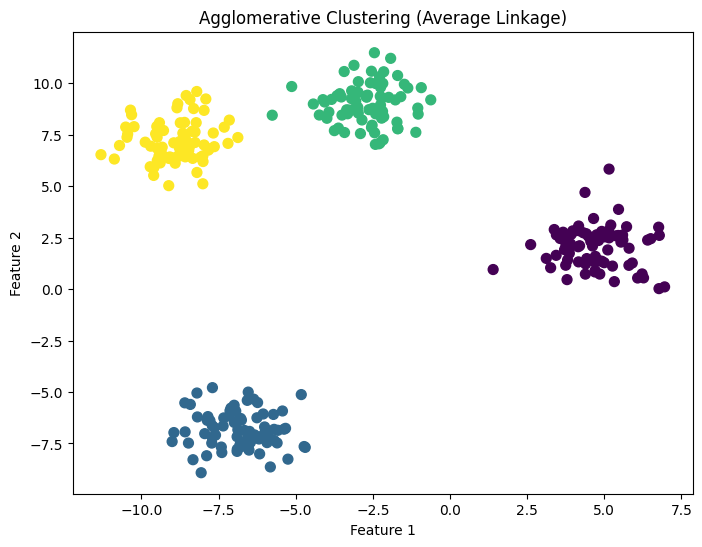

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply Agglomerative with average linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
y_pred = agg.fit_predict(X)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title('Agglomerative Clustering (Average Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features)?


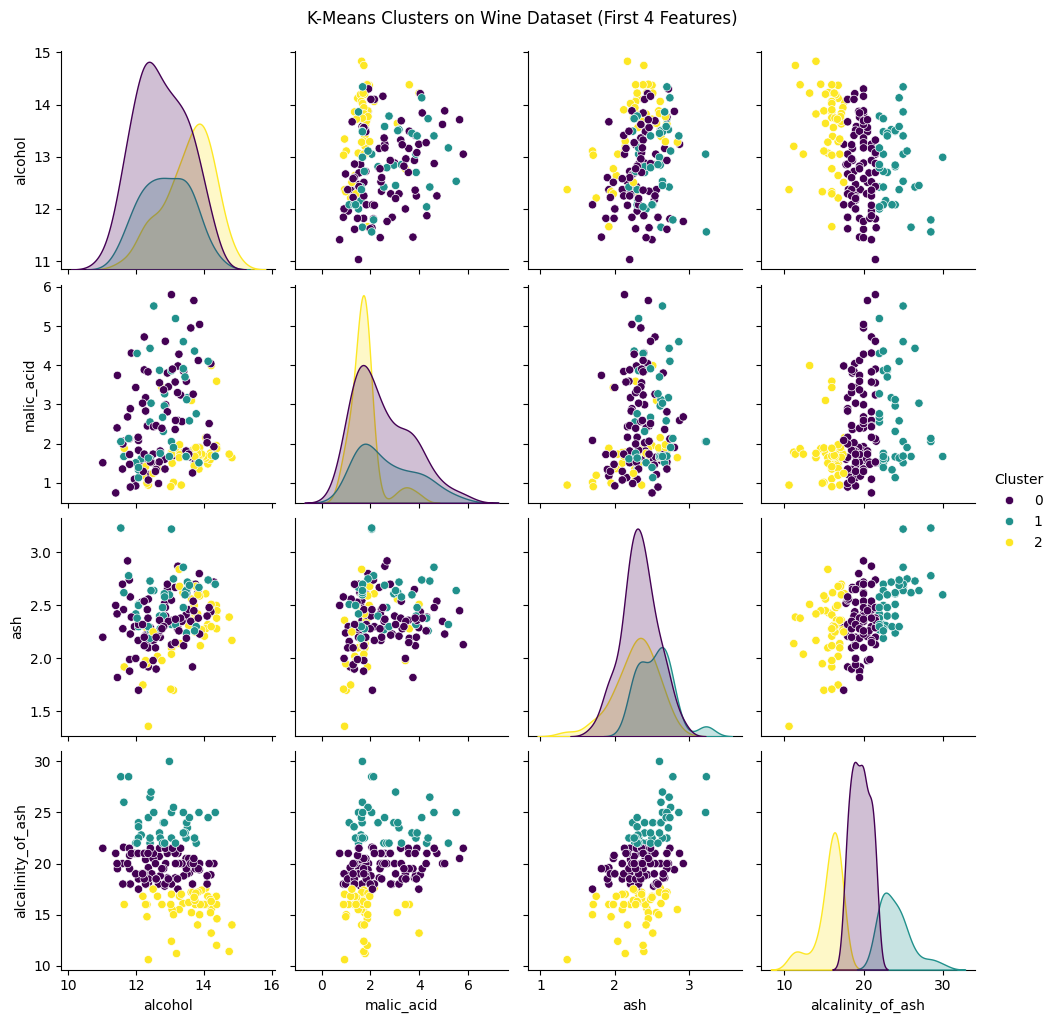

In [23]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

# Load Wine
wine = load_wine()
X = wine.data[:, :4]  # First 4 features
feature_names = wine.feature_names[:4]

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Create DataFrame for pairplot
df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = y_pred

# Pairplot
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('K-Means Clusters on Wine Dataset (First 4 Features)', y=1.02)
plt.show()

47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count?


In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate noisy blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X)

# Count clusters and noise
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
n_noise = list(y_pred).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 5
Number of noise points: 52


48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters.

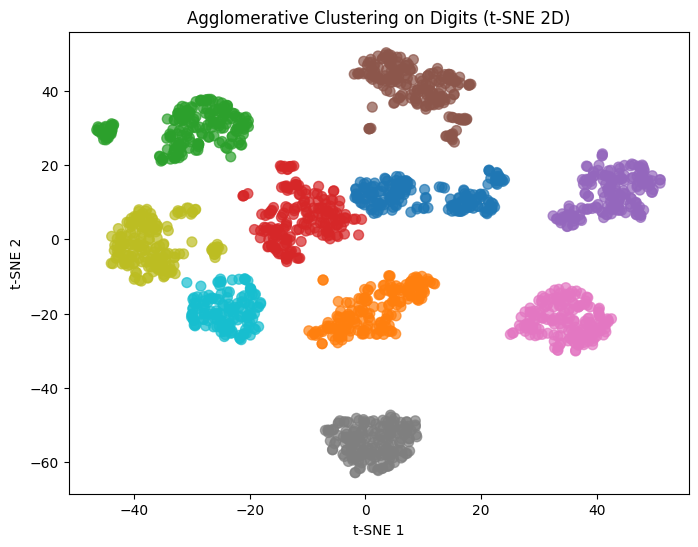

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# Load Digits
digits = load_digits()
X = digits.data

# Reduce to 2D with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=10)
y_pred = agg.fit_predict(X_tsne)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='tab10', s=50, alpha=0.7)
plt.title('Agglomerative Clustering on Digits (t-SNE 2D)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()